In [1]:
from html.parser import HTMLParser
import re
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os, csv
from tqdm import tqdm
import pickle
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
# open website
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications": 2}
chrome_options.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome(executable_path='C:\Windows\chromedriver.exe')
driver = webdriver.Chrome(chrome_options=chrome_options)

# URL
driver.get('https://newslab.malaysiakini.com/covid-19/en/patients')


C:\Users\Zuhaili\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


<html><head><title>Patient Info | Covid-19 in Malaysia | Kini News Lab | Malaysiakini</title><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="120753558639" property="fb:app_id"/><meta content="en_MY" property="og:locale"/><meta content="article" property="og:type"/><meta content="https://newslab.malaysiakini.com/covid-19/en/patients" property="og:url"/><meta content="Patient Info | Covid-19 in Malaysia" property="og:title"/><meta content="Follow the latest updates and essential information on the outbreak in Malaysia, all in one place." property="og:description"/><meta content="Kini News Lab | Malaysiakini" property="og:site_name"/><meta content="https://newslab.malaysiakini.com/covid-19/img/covid-19_fb_1200x630_en_debug.png" property="og:image"/><meta content="2020-03-10T12:15:00+08:00" property="article:published_time"/><m
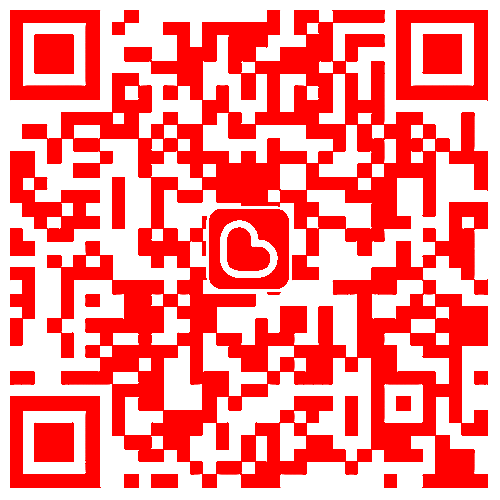

In [10]:
# Baca semua html page
html_soup = BeautifulSoup(driver.page_source, 'html.parser')
html_soup

In [11]:
# filter table sahaja (get the data)
data_containers = html_soup.find_all('tr', class_='jsx-2078434787 bg-treatment')
data_containers

[<tr class="jsx-2078434787 bg-treatment" style="cursor: pointer;" title="Toggle Row Expanded"><td class="jsx-2078434787 uk-text-right" role="cell" style="font-size: 50px; line-height: 18px;"><span aria-expanded="false" data-uk-tooltip="title: In treatment" style="color: rgb(233, 30, 99);" title="">•</span></td><td class="jsx-2078434787" role="cell"><img alt="" src="/covid-19/img/flags/my.svg" style="width: 24px;"/></td><td class="jsx-2078434787 uk-hidden" role="cell"></td><td class="jsx-2078434787 uk-visible@s" role="cell">?</td><td class="jsx-2078434787 uk-text-left" role="cell"><div class="uk-visible@s uk-text-small">?</div><div class="uk-hidden@s uk-text-muted">?</div></td><td class="jsx-2078434787 uk-visible@s uk-text-left uk-text-small" role="cell">Selangor</td><td class="jsx-2078434787 uk-text-muted" role="cell"></td><td class="jsx-2078434787 uk-hidden" role="cell"></td><td class="jsx-2078434787 uk-text-muted" role="cell"></td><td class="jsx-2078434787 uk-hidden" role="cell"></td

In [16]:
# for each table get row by row. For each rows, extract data in term of text. Refer to html to get the field
for data in data_containers:
    print("--------------")
    # get age
    age.append(data.find('td', class_='jsx-2078434787 uk-visible@s').text)
    # get gender jsx-2078434787 uk-text-left
    print(data.find('td', class_='jsx-2078434787 uk-text-left').text)
    # get state 
    print(data.find('td', class_='jsx-2078434787 uk-visible@s uk-text-left uk-text-small').text)
    # get cluster name
    print(data.find('td', class_='jsx-2078434787 uk-visible@s uk-text-right uk-text-small').text)
#     print("--------------")

--------------
??
Selangor
Returned from Sabah
--------------
??
Kedah
Contact with 11471
--------------
??
Kedah
Part of Tembok cluster
--------------
??
Sabah
Community screening
--------------
??
Sabah

--------------
??
Sabah
Senior citizen
--------------
??
Sabah
Healthcare worker
--------------
??
Sabah
SARI
--------------
??
Sabah
Part of Pulau cluster
--------------
??
Sabah
Part of Laut cluster


In [13]:
def get_data(session):
    global country
    global age
    global gender
    global state
    global cluster
    global case_number
    
    # print('---session---',str(session))
    data_containers = html_soup.find_all('tr', class_='jsx-2078434787 bg-treatment')
    for data in data_containers:
        # get country
        if data.find('img') is not None:
            s = str(data.find('img'))
            str1 = re.findall('/.*?svg', s)
            str2 = str1[0]
            str3 = str2.replace('.svg', '')
            str4 = str3.replace('/covid-19/img/flags/', '')
            country.append(str4.upper())
        else:
            country.append(None)
        # get age
        age.append(data.find('td', class_='jsx-2078434787 uk-visible@s').text)
        # get gender jsx-2078434787 uk-text-left
        gender.append(data.find('td', class_='jsx-2078434787 uk-text-left').text)
        # get state 
        state.append(data.find('td', class_='jsx-2078434787 uk-visible@s uk-text-left uk-text-small').text)
        # get cluster name
        cluster.append(data.find('td', class_='jsx-2078434787 uk-visible@s uk-text-right uk-text-small').text)
        # get case number
        case_number.append(data.find('td', class_='jsx-2078434787 uk-text-right uk-text-small').text)

In [14]:
country = []
age = []
gender = []
state = []
cluster = []
case_number = []

for url in tqdm(range(200)):
    html_soup = BeautifulSoup(driver.page_source, 'html.parser')
    get_data(url)
    
    link = driver.find_element_by_xpath(u'//button[contains(text(), ">")]')
    link.click()
#     time.sleep(1)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [17:31<00:00,  5.26s/it]


In [5]:
df = pd.DataFrame({
    'country' : country,
    'age' : age,
    'gender' : gender,
    'state' : state,
    'cluster' : cluster,
    'case_number' : case_number
    })

print(df.info())
print(len(country))
print(len(age))
print(len(gender))
print(len(state))
print(len(cluster))
print(len(case_number))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 6 columns):
country        1582 non-null object
age            1739 non-null object
gender         1739 non-null object
state          1739 non-null object
cluster        1739 non-null object
case_number    1739 non-null object
dtypes: object(6)
memory usage: 81.6+ KB
None
1739
1739
1739
1739
1739
1739


In [15]:
df.to_csv('data3_20201013.csv', index=False)